In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
import re

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data)

In [4]:
df.columns = [re.sub(' \(cm\)','', feature) for feature in iris.feature_names] 

In [5]:
df = pd.concat([df,pd.DataFrame({'label':iris.target})],axis=1)

In [6]:
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [7]:
from sklearn.cross_validation import train_test_split

C:\Users\dongy\Anaconda3.1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
list(df)

['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [9]:
X = df[['sepal length', 'sepal width', 'petal length', 'petal width']].values
Y = df['label'].values

# Iris data를 이용하여 DT와 RF 성능비교

## http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [33]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)

In [34]:
print('Prediction Accuracy: ', clf.score(X = X_test, y = y_test))

Prediction Accuracy:  0.9777777777777777


In [46]:
clf.feature_importances_

array([0.14785468, 0.03517774, 0.4935821 , 0.32338548])

In [47]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

In [37]:
print('Prediction Accuracy: ', clf_dt.score(X = X_test, y = y_test))

Prediction Accuracy:  0.9555555555555556


In [38]:
clf_dt.feature_importances_

array([0.        , 0.        , 0.02265101, 0.97734899])

In [39]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus as pydot
import os

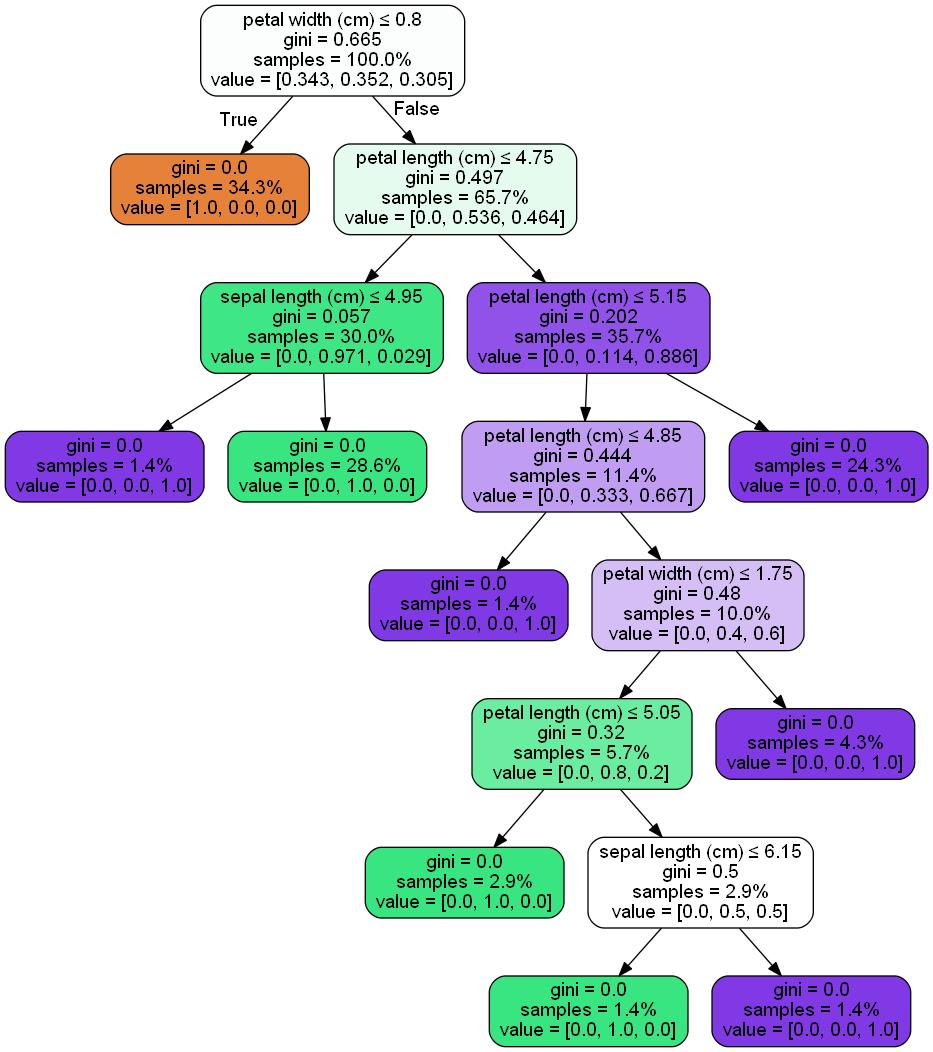

In [48]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()
export_graphviz(clf.estimators_[9], out_file=dot_data, feature_names=iris.feature_names,\
               impurity=True, proportion=True, filled=True, rounded=True,\
                         special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg('tree.jpeg')
Image(filename='tree.jpeg')

# 실습: Boston weather data를 이용하여 RF와 DT 성능 비교

## feature importance도 함께 비교

In [20]:
data = pd.read_csv('Boston weather_clean.csv')

In [21]:
data

,Year,Month,Day,High Temp (F),Avg Temp (F),Low Temp (F),High Dew Point (F),Avg Dew Point (F),Low Dew Point (F),High Humidity (%),...,Low Sea Level Press (in),High Visibility (mi),Avg Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events
0,2008,1,1,40,34,28,37,31,22,92,...,29.56,10,8,1,23,10,36,0.18,0.18,Both
1,2008,1,2,33,22,10,28,18,-3,82,...,29.55,10,10,9,28,15,38,0.00,0.00,Snow
2,2008,1,3,14,11,7,-3,-7,-9,60,...,30.22,10,10,10,25,17,32,0.00,0.00,None
3,2008,1,4,32,20,8,13,5,-8,63,...,30.37,10,10,10,23,12,28,0.00,0.00,None
4,2008,1,5,42,35,27,26,16,12,64,...,30.17,10,10,10,16,9,23,0.00,0.00,None
5,2008,1,6,47,42,36,34,30,24,82,...,30.15,10,10,9,15,7,20,0.00,0.00,None
6,2008,1,7,55,45,35,43,38,32,92,...,30.13,10,8,5,18,7,22,0.00,0.00,None
7,2008,1,8,67,56,45,49,45,41,86,...,29.93,10,9,7,18,12,23,0.00,0.00,None
8,2008,1,9,62,54,46,52,41,17,90,...,29.64,10,10,9,29,18,37,0.00,0.00,Rain
9,2008,1,10,49,44,38,31,25,21,70,...,29.92,10,10,10,16,11,22,0.00,0.00,None


In [22]:
data = data.drop(['Year','Month','Day','Snowfall (in)','Precip (in)'], axis=1)

In [71]:
X = data.iloc[:,([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])].values
y = data.iloc[:,(18)]

In [77]:

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
clf.feature_importances_

clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

clf_dt.feature_importances_

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()
export_graphviz(clf.estimators_[9], out_file=dot_data, feature_names=iris.feature_names,\
               impurity=True, proportion=True, filled=True, rounded=True,\
                         special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg('tree.jpeg')
Image(filename='tree.jpeg')




C:\Users\dongy\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ValueError: Length of feature_names, 4 does not match number of features, 18

# Gradient Boosting Tree

## http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4)
clf = clf.fit(X_train, y_train)

In [25]:
print('Prediction Accuracy: ', clf.score(X = X_test, y = y_test))

Prediction Accuracy:  1.0


In [26]:
clf.feature_importances_

array([0.03137772, 0.01403978, 0.33731104, 0.25727146])

In [27]:
clf.train_score_

array([9.61729731e+01, 8.12192064e+01, 6.91530660e+01, 5.92405084e+01,
       5.08185888e+01, 4.38250879e+01, 3.78372073e+01, 3.27604976e+01,
       2.84111379e+01, 2.46963750e+01, 2.15215921e+01, 1.87877148e+01,
       1.64138388e+01, 1.43388222e+01, 1.25209077e+01, 1.09696788e+01,
       9.60561390e+00, 8.40274553e+00, 7.36744608e+00, 6.47217748e+00,
       5.66879123e+00, 4.96769903e+00, 4.35546793e+00, 3.82051164e+00,
       3.35281800e+00, 2.94537217e+00, 2.59250652e+00, 2.27675001e+00,
       2.00031318e+00, 1.75820367e+00, 1.54604445e+00, 1.36490098e+00,
       1.20037264e+00, 1.05614211e+00, 9.29662474e-01, 8.18088890e-01,
       7.22936536e-01, 6.36695310e-01, 5.62601756e-01, 4.97646231e-01,
       4.40672745e-01, 3.90672185e-01, 3.46763643e-01, 3.03420366e-01,
       2.65501089e-01, 2.32325554e-01, 2.03299169e-01, 1.77902141e-01,
       1.55679998e-01, 1.36235338e-01, 1.19220620e-01, 1.04331882e-01,
       9.21224584e-02, 8.14159848e-02, 7.20234813e-02, 6.39045259e-02,
      

In [28]:
list(data.iloc[:,([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])])

['High Temp (F)',
 'Avg Temp (F)',
 'Low Temp (F)',
 'High Dew Point (F)',
 'Avg Dew Point (F)',
 'Low Dew Point (F)',
 'High Humidity (%)',
 'Avg Humidity (%)',
 'Low Humidity (%)',
 'High Sea Level Press (in)',
 'Avg Sea Level Press (in)',
 'Low Sea Level Press (in)',
 'High Visibility (mi)',
 'Avg Visibility (mi)',
 'Low Visibility (mi)',
 'High Wind (mph)',
 'Avg Wind (mph)',
 'High Wind Gust (mph)']

In [76]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()
export_graphviz(clf.estimators_[94,3], out_file=dot_data, feature_names=list(data.iloc[:,([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])]),\
               impurity=True, proportion=True, filled=True, rounded=True,\
                         special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg('tree.jpeg')
Image(filename='tree.jpeg')

TypeError: list indices must be integers or slices, not tuple